In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib_venn import venn2

In [2]:
myfile = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp2_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.imputed.csv'
amfile = '/Volumes/tuba/marquard/tcr_seq/10x-barcoding/2019_02_25_Exp2/results/r/tb_plot.xlsx'
#amfile = '/Volumes/tuba/marquard/tcr_seq/10x-barcoding/2019_02_25_Exp2/results/r/gems_sorted_like_figures.xlsx'

In [3]:
mapfile = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp2_MHC_IONTORRENT/mapping/KMA-1t1/output/mapping.clean.gz'
mapfile2 = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp2_MHC_IONTORRENT/mapping/KMA-1t1/output/mapping.clean.AKB.augmented.gz'

In [4]:
tcrfile = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp2_TCR/processed/cellranger_out/TCR_VDJ/outs/all_contig_annotations.csv'
tcrfile2 = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp2_TCR/augmented/tcr.clean.augmented.csv'

In [5]:
umi = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp2_MHC_IONTORRENT/barcode_library/umi.tsv'

In [6]:
tcr_df = pd.read_csv(tcrfile)
tcr_df['barcode'] = tcr_df.barcode.str.strip('-1')
tcr2 = pd.read_csv(tcrfile2)
tcr2['gem'] = tcr2.gem.str.strip('-1')

In [7]:
tcr2

,gem,clonotype,num_clonotype,ct,length_TRA,cdr3_TRA,umi_count_TRA,umi_count_lst_TRA,delta_umi_TRA,cdr3_lst_TRA,...,cdr3_lst_TRB,chain_count_TRB,single_TRB,single_chain_only,umi_count_tcr,cdr3_comb,tcr_category,no_filtration,exclude_single-chain_TCRs,exclude_ambiguous_and_single-chain_TCRs
0,AAACCTGAGAATGTTG,None,0,6,512.0,CAAKSDSGGGADGLTF,1.0,[1],4.0,['CAAKSDSGGGADGLTF'],...,NaN,NaN,NaN,True,1.0,CAAKSDSGGGADGLTF,missing chain,True,False,False
1,AAACCTGAGAGCTTCT,clonotype36,36,72,469.0,CILKGDKLIF,7.0,"[2, 7]",3.0,['CAGLTSGSRLTF' 'CILKGDKLIF'],...,['CAIYSPGMLGYTF'],1.0,True,False,21.0,CILKGDKLIFCAIYSPGMLGYTF,multiple chains,True,True,False
2,AAACCTGCAAAGTCAA,None,0,3052,509.0,CAGNYGGSQGNLIF,1.0,[1],4.0,['CAGNYGGSQGNLIF'],...,['CASSLVVVDEQFF'],1.0,True,False,2.0,CAGNYGGSQGNLIFCASSLVVVDEQFF,unique chains,True,True,True
3,AAACCTGCAAGTTAAG,None,0,6,577.0,CAAKSDSGGGADGLTF,1.0,[1],4.0,['CAAKSDSGGGADGLTF'],...,NaN,NaN,NaN,True,1.0,CAAKSDSGGGADGLTF,missing chain,True,False,False
4,AAACCTGCACAACGTT,None,0,6,520.0,CAAKSDSGGGADGLTF,1.0,"[1, 1]",0.0,['CAASNLVF' 'CAAKSDSGGGADGLTF'],...,NaN,NaN,NaN,True,1.0,CAAKSDSGGGADGLTF,missing chain,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16343,TTTGTCATCCTAGAAC,None,0,2,NaN,NaN,NaN,NaN,NaN,NaN,...,['CASSAWTSNRDEQFF'],1.0,True,True,1.0,CASSAWTSNRDEQFF,missing chain,True,False,False
16344,TTTGTCATCCTTAATC,None,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,['CASSLVVVDEQFF'],1.0,True,True,1.0,CASSLVVVDEQFF,missing chain,True,False,False
16345,TTTGTCATCGCGTTTC,None,0,22,NaN,NaN,NaN,NaN,NaN,NaN,...,['CASSPTRLGYGYTF'],1.0,True,True,1.0,CASSPTRLGYGYTF,missing chain,True,False,False
16346,TTTGTCATCGGAAATA,None,0,46,NaN,NaN,NaN,NaN,NaN,NaN,...,['CASSPGQGGDYEQYF'],1.0,True,True,1.0,CASSPGQGGDYEQYF,missing chain,True,False,False


In [8]:
map_df = pd.read_csv(mapfile)
map_df['gem'] = map_df.gem.str.strip('-1')

In [9]:
map2 = pd.read_csv(mapfile2)
map2['gem'] = map_df.gem.str.strip('-1')

In [10]:
umi_df = pd.read_csv(umi, sep='\t', usecols=['read', 'gem', 'A_N6', 'B_N6'])
umi_df.rename(columns={'read':'query_id'}, inplace=True)

In [29]:
h_df = pd.read_csv(myfile, usecols=['gem','clonotype','num_clonotype','cdr3_TRA', 'cdr3_lst_TRA','umi_count_lst_TRA','cdr3_TRB','cdr3_lst_TRB','umi_count_lst_TRB','epitope', 'epitope_lst', 'umi_count_lst_mhc','gems_per_specificity'])
h_df['gem'] = h_df.gem.str.strip('-1')
m_df = pd.read_excel(amfile, usecols=['gem','raw_clonotype_id','clonotype','TRA.cdr3','TRA.umis','TRB.cdr3','TRB.umis','epitope','reads','n_gems_w_clonotype'])
m_df['epitope'] = m_df.epitope.apply(lambda x: 'ADIR' if 'ADIR' in x else x)

# Merge

In [30]:
df = pd.merge(h_df, m_df, how='outer', on='gem')

In [31]:
df

,gem,clonotype_x,num_clonotype,cdr3_TRA,umi_count_lst_TRA,cdr3_lst_TRA,cdr3_TRB,umi_count_lst_TRB,cdr3_lst_TRB,umi_count_lst_mhc,...,gems_per_specificity,clonotype_y,raw_clonotype_id,TRA.cdr3,TRA.umis,TRB.cdr3,TRB.umis,epitope_y,reads,n_gems_w_clonotype
0,AAACGGGTCAACACCA,clonotype30,30.0,CAEPGFQKLVF,[2],['CAEPGFQKLVF'],CASSQGVSTSTDTQYF,[15],['CASSQGVSTSTDTQYF'],[1],...,1.0,27.0,clonotype27,CAEPGFQKLVF,1.0,CASSQGVSTSTDTQYF,13.0,MELPEP-023,1.0,2.0
1,AAAGATGTCAGGCAAG,clonotype20,20.0,CALSESHHVGFKTIF,[3],['CALSESHHVGFKTIF'],CASSLDTGGTSYTF,[10],['CASSLDTGGTSYTF'],"[1, 1]",...,1.0,23.0,clonotype23,CALSESHHVGFKTIF,3.0,CASSLDTGGTSYTF,4.0,v15,18.0,2.0
2,AAAGTAGAGATGAGAG,clonotype8,8.0,CAASEGGADGLTF,[3],['CAASEGGADGLTF'],CASRPRLDGLYQETQYF,[3],['CASRPRLDGLYQETQYF'],[1],...,3.0,7.0,clonotype7,CAASEGGADGLTF,3.0,CASRPRLDGLYQETQYF,3.0,v25,1.0,4.0
3,AAAGTAGAGATGAGAG,clonotype8,8.0,CAASEGGADGLTF,[3],['CAASEGGADGLTF'],CASRPRLDGLYQETQYF,[3],['CASRPRLDGLYQETQYF'],[1],...,3.0,7.0,clonotype7,CAASEGGADGLTF,3.0,CASRPRLDGLYQETQYF,3.0,v17,8.0,4.0
4,AAAGTAGTCACCCTCA,clonotype22,22.0,CASFSFYNQGGKLIF,[9],['CASFSFYNQGGKLIF'],CSASPTGQGYTDTQYF,[12],['CSASPTGQGYTDTQYF'],[3],...,12.0,24.0,clonotype24,CASFSFYNQGGKLIF,9.0,CSASPTGQGYTDTQYF,11.0,v9,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,TAAGCGTTCAAACGGG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,clonotype2,CAAKSDSGGGADGLTF,25.0,CASSAWTSNRDEQFF,31.0,CLYBL,24.0,28.0
1614,AGAGTGGTCTCTGTCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,clonotype100,NaN,0.0,CASSPILAGVDTQYF,6.0,v15,1.0,1.0
1615,AGCGTATGTCCATCCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.0,clonotype36,CALSDPPHAGRDDKIIF,1.0,CATKRGLGDTQYF,7.0,v15,18.0,3.0
1616,CATCAAGAGGATGCGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,59.0,clonotype59,NaN,0.0,CASSQGVSTSTDTQYF,8.0,v15,14.0,2.0


In [32]:
df['epitope_agreement'] = df.fillna('').apply(lambda row: True if (row.epitope_x == row.epitope_y) & (row.epitope_x != '') else False, axis=1)
df['tra_agreement'] = df.fillna('').apply(lambda row: True if (row.cdr3_TRA == row['TRA.cdr3']) & (row.cdr3_TRA!='') else False, axis=1)
df['trb_agreement'] = df.fillna('').apply(lambda row: True if (row.cdr3_TRB == row['TRB.cdr3']) & (row.cdr3_TRB!='') else False, axis=1)
df['trio_agreement'] = df.fillna('').apply(lambda row: True if row.epitope_agreement & row.tra_agreement & row.trb_agreement else False, axis=1)
df['epitope_disagreement'] = df.fillna('').apply(lambda row: True if (row.epitope_x != row.epitope_y) & (row.epitope_x != '') else False, axis=1)

# Total number of GEMs

Text(0.5, 1.0, 'GEMs intersecting between Helle and Andrea')

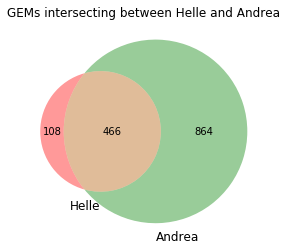

In [33]:
a, b = set(h_df.gem), set(m_df.gem)

ab = a.intersection(b)
a_b = a - ab
b_a = b - ab

title = "GEMs intersecting between Helle and Andrea"
venn2(subsets = (len(a_b), len(b_a), len(ab)), set_labels = ('Helle', 'Andrea'))
plt.title(title)

In [34]:
# GEMs with missing CDR3
m_df[m_df['TRA.cdr3'].isna() & m_df['TRB.cdr3'].isna()].gem.unique().shape

(1042,)

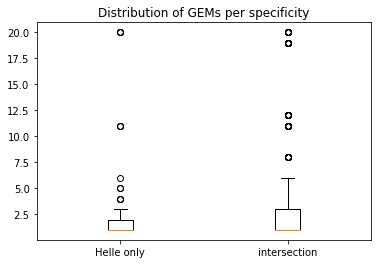

In [35]:
x1 = h_df[h_df.gem.isin(a_b)].gems_per_specificity.dropna()
x2 = h_df[h_df.gem.isin(ab)].gems_per_specificity.dropna()

plt.boxplot([x1, x2], labels=['Helle only','intersection'])
plt.title('Distribution of GEMs per specificity')
plt.show()

# Number of GEMs with a TCR chain

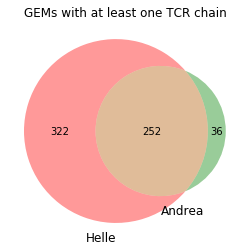

In [36]:
a = set(h_df[~h_df.cdr3_TRA.isna() | ~h_df.cdr3_TRB.isna()].gem)
b = set(m_df[~m_df['TRA.cdr3'].isna() | ~m_df['TRB.cdr3'].isna()].gem)

ab = a.intersection(b)
a_b = a - ab
b_a = b - ab

title = "GEMs with at least one TCR chain"
venn2(subsets = (len(a_b), len(b_a), len(ab)), set_labels = ('Helle', 'Andrea'))
plt.title(title)

shared_gems = a.intersection(b)

## What are the missing 36 GEMs? Why did I not keep them?

### Andreas set

In [37]:
answered_gems = set(m_df[m_df.gem.isin(b_a) & (m_df.epitope == '0')].gem)
remaining_gems = b_a - answered_gems
print('%d GEMs were annotated with epitope 0' %len(answered_gems))
print('%d GEMs remaining' %len(remaining_gems))

m_df[m_df.gem.isin(remaining_gems)]

14 GEMs were annotated with epitope 0
22 GEMs remaining


,gem,clonotype,raw_clonotype_id,TRA.cdr3,TRA.umis,TRB.cdr3,TRB.umis,epitope,reads,n_gems_w_clonotype
1205,ATCGAGTCATTAACCG,540.0,clonotype540,CAENIPGGYQKVTF,6,CASGEDGGEQFF,16,v31,1,1
1214,TTTCCTCGTCCAAGTT,1629.0,clonotype1629,CAAKRKDSNYQLIW,3,NaN,0,MELPEP-094,71,1
1228,AAGACCTTCATTTGGG,178.0,clonotype178,NaN,0,CASSQEDSRKVNEKLFF,5,MELPEP-008,33,1
1232,TGCACCTGTAGCTGCC,13.0,clonotype13,CAYSWETSGSRLTF,4,CASRAWEGYTF,7,v1,60,3
1245,AGCTTGACACATTTCT,1.0,clonotype1,CAASNLVF,5,CASSLVVVDEQFF,35,MELPEP-044,2,20
1252,ACGGAGACATTCCTCG,2.0,clonotype2,CAAKSDSGGGADGLTF,14,CASSAWTSNRDEQFF,23,MELPEP-017,1,28
1254,GTATTCTAGCTCCTCT,1252.0,clonotype1252,NaN,0,CASSPESGITDTQYF,6,MELPEP-017,19,1
1256,TCAGGATGTGACTCAT,1403.0,clonotype1403,CVVSDLGNSGYALNF,7,CASSSTGAPNSPLHF,6,v27,1,1
1259,TCGTACCTCGACCAGC,3.0,clonotype3,CALYNTDKLIF,1,CASSPTSGSVYEQYF,10,v10,1,18
1314,CATGGCGCAAGTTGTC,2.0,clonotype2,CAAKSDSGGGADGLTF,9,CASSAWTSNRDEQFF,27,v9,1,28


### KMA mapping

In [38]:
answered_gems = remaining_gems - set(map_df[map_df.gem.isin(remaining_gems)].gem)
remaining_gems = set(map_df[map_df.gem.isin(remaining_gems)].gem)
print('%d GEMs not mapped at all' %len(answered_gems))
print('%d GEMs remaining' %len(remaining_gems))

map_df[map_df.gem.isin(remaining_gems)].groupby('gem').uncertainty.unique()

14 GEMs not mapped at all
8 GEMs remaining


gem
AAGACCTTCATTTGGG        [1]
ACATGGTAGATGCCTT        [1]
AGCGTATGTCCATCCT      [135]
AGCTTGACACATTTCT       [15]
CGTAGCGCATGGGACA        [9]
TCAGGTATCATCACCC        [1]
TGCACCTGTAGCTGCC    [15, 1]
TTTCCTCGTCCAAGTT     [1, 9]
Name: uncertainty, dtype: object

In [39]:
m_df.columns

Index(['gem', 'clonotype', 'raw_clonotype_id', 'TRA.cdr3', 'TRA.umis',
       'TRB.cdr3', 'TRB.umis', 'epitope', 'reads', 'n_gems_w_clonotype'],
      dtype='object')

In [40]:
pd.merge(tcr2.loc[tcr2.gem.isin(answered_gems), ['gem','cdr3_TRA','umi_count_lst_TRA','cdr3_TRB','umi_count_lst_TRB']], m_df.loc[m_df.gem.isin(answered_gems), ['gem','TRA.cdr3','TRA.umis','TRB.cdr3','TRB.umis']], on='gem')

,gem,cdr3_TRA,umi_count_lst_TRA,cdr3_TRB,umi_count_lst_TRB,TRA.cdr3,TRA.umis,TRB.cdr3,TRB.umis
0,ACGGAGACATTCCTCG,CAAKSDSGGGADGLTF,[14],CASSAWTSNRDEQFF,[23],CAAKSDSGGGADGLTF,14,CASSAWTSNRDEQFF,23
1,AGAGTGGTCTCTGTCG,CAVKDTDKLIF,[2],CASSPILAGVDTQYF,[8],NaN,0,CASSPILAGVDTQYF,6
2,ATCGAGTCATTAACCG,CAENIPGGYQKVTF,[5],CASGEDGGEQFF,[15],CAENIPGGYQKVTF,6,CASGEDGGEQFF,16
3,CATGGCGCAAGTTGTC,CAAKSDSGGGADGLTF,[9],CASSAWTSNRDEQFF,[29],CAAKSDSGGGADGLTF,9,CASSAWTSNRDEQFF,27
4,CTACCCATCCAAACAC,CAEDRYSTLTF,[1],CSARSGVGNTIYF,[10],CAEDRYSTLTF,1,CSARSGVGNTIYF,9
5,CTGCCTATCAACACAC,CAESTGKLIF,[2],CSVGTGGTNEKLFF,[9],CAESTGKLIF,2,CSVGTGGTNEKLFF,6
6,TAAGCGTTCAAACGGG,CAAKSDSGGGADGLTF,[26],CASSAWTSNRDEQFF,[30],CAAKSDSGGGADGLTF,25,CASSAWTSNRDEQFF,31
7,TCAGGATGTGACTCAT,CVVSDLGNSGYALNF,[8],CASSSTGAPNSPLHF,[7],CVVSDLGNSGYALNF,7,CASSSTGAPNSPLHF,6
8,TCGTACCTCGACCAGC,CALYNTDKLIF,[1],CASSPTSGSVYEQYF,[11],CALYNTDKLIF,1,CASSPTSGSVYEQYF,10
9,TCGTACCTCGACCAGC,CALYNTDKLIF,[1],CASSPTSGSVYEQYF,[11],CALYNTDKLIF,1,CASSPTSGSVYEQYF,10


In [40]:
m_df[m_df.gem.isin(answered_gems)].sort_values(by='gem')

,gem,clonotype,raw_clonotype_id,TRA.cdr3,TRB.cdr3,epitope,reads,n_gems_w_clonotype
1252,ACGGAGACATTCCTCG,2.0,clonotype2,CAAKSDSGGGADGLTF,CASSAWTSNRDEQFF,MELPEP-017,1,28
1450,AGAGTGGTCTCTGTCG,100.0,clonotype100,NaN,CASSPILAGVDTQYF,v15,1,1
1205,ATCGAGTCATTAACCG,540.0,clonotype540,CAENIPGGYQKVTF,CASGEDGGEQFF,v31,1,1
1386,CACATTTTCGACGGAA,211.0,clonotype211,NaN,CASSGQGGGYGYTF,v17,2,2
1466,CATCAAGAGGATGCGT,59.0,clonotype59,NaN,CASSQGVSTSTDTQYF,v15,14,2
1314,CATGGCGCAAGTTGTC,2.0,clonotype2,CAAKSDSGGGADGLTF,CASSAWTSNRDEQFF,v9,1,28
1350,CTACCCATCCAAACAC,10.0,clonotype10,CAEDRYSTLTF,CSARSGVGNTIYF,v6,10,4
1396,CTGCCTATCAACACAC,108.0,clonotype108,CAESTGKLIF,CSVGTGGTNEKLFF,v17,1,1
1357,GCATGATTCCCTAACC,6.0,clonotype6,NaN,CASSPTSGSVYEQYF,v6,1,3
1254,GTATTCTAGCTCCTCT,1252.0,clonotype1252,NaN,CASSPESGITDTQYF,MELPEP-017,19,1


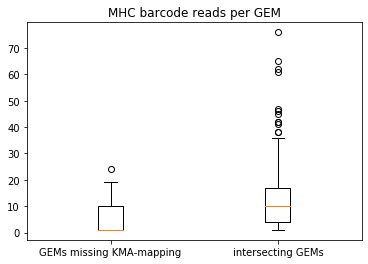

In [44]:
plt.boxplot([m_df[m_df.gem.isin(answered_gems)].reads, m_df[m_df.gem.isin(ab)].reads],
            labels=['GEMs missing KMA-mapping','intersecting GEMs'])
plt.title('MHC barcode reads per GEM')
plt.show()

In [21]:
answered_gems = set(map_df[map_df.gem.isin(remaining_gems) & (map_df.uncertainty > 1)].gem)
remaining_gems = remaining_gems - answered_gems
print('%d GEMs were mapped with uncertainty' %len(answered_gems))
print('%d GEMs remaining' %len(remaining_gems))

5 GEMs were mapped with uncertainty
3 GEMs remaining


In [22]:
map_df[map_df.gem.isin(answered_gems) & (map_df.uncertainty > 1)].groupby('gem').uncertainty.unique()

gem
AGCGTATGTCCATCCT    [135]
AGCTTGACACATTTCT     [15]
CGTAGCGCATGGGACA      [9]
TGCACCTGTAGCTGCC     [15]
TTTCCTCGTCCAAGTT      [9]
Name: uncertainty, dtype: object

The GEMs are lost between KMA mapping and the clean mapping, since none of the gems are present in the clean mapping file.

In [23]:
map2[map2.gem.isin(b_a)]

,gem,template_id_mhc,template_lst_mhc,single_barcode_mhc,umi_count_mhc,umi_count_lst_mhc,read_count_mhc,read_count_lst_mhc,multiplets_mhc,delta_umi_mhc,...,sample_id_lst,HLA_lst,HLA_cd8,HLA_mhc,peptide,peptide_lst,peptide_HLA,peptide_HLA_lst,epitope,epitope_lst


### UMI mapping

In [24]:
answered_gems = remaining_gems - set(umi_df[umi_df.gem.isin(remaining_gems)].gem)
remaining_gems = set(umi_df[umi_df.gem.isin(remaining_gems)].gem)
print('%d GEMs not in UMI annotation set' %len(answered_gems))
print('%d GEMs remaining' %len(remaining_gems))

missing_umi_gems = answered_gems

umi_df[umi_df.gem.isin(remaining_gems)]

0 GEMs not in UMI annotation set
3 GEMs remaining


,query_id,gem,A_N6,B_N6
3111,N1F7E:01459:01366,AAGACCTTCATTTGGG,AGGTAA,GC
3112,N1F7E:00863:01554,AAGACCTTCATTTGGG,AGGTAA,GC
3113,N1F7E:00672:02446,AAGACCTTCATTTGGG,AGGTAA,GC
3114,N1F7E:00582:03822,AAGACCTTCATTTGGG,AGGTAA,GC
3115,N1F7E:00345:01821,AAGACCTTCATTTGGG,AGGTAA,GC
3116,N1F7E:00315:05079,AAGACCTTCATTTGGG,AGGTAA,GC
3117,N1F7E:00223:02944,AAGACCTTCATTTGGG,AGGTAA,GC
3118,N1F7E:00189:04464,AAGACCTTCATTTGGG,AGGTAA,GC
11103,N1F7E:01718:01086,TCAGGTATCATCACCC,GGGCTG,NaN
11104,N1F7E:01366:02390,TCAGGTATCATCACCC,GGGCTG,NaN


In [25]:
answered_gems = set(umi_df[umi_df.gem.isin(remaining_gems) & umi_df.A_N6.isna()].gem).union(set(umi_df[umi_df.gem.isin(remaining_gems) & umi_df.B_N6.isna()].gem)) #.apply(lambda row: row.A_N6 + row.B_N6, axis=1)
remaining_gems = remaining_gems - answered_gems
print('%d GEMs with missing N6 region' %len(answered_gems))
print('%d GEMs remaining' %len(remaining_gems))

1 GEMs with missing N6 region
2 GEMs remaining


In [26]:
umi_df.set_index('gem', inplace=True)
answered_gems = set(umi_df[umi_df.index.isin(remaining_gems) &
                           umi_df.apply(lambda row: len(str(row.A_N6) + str(row.B_N6))<12, axis=1)].index)
remaining_gems = remaining_gems - answered_gems
print('%d GEMs with shortened N6 region' %len(answered_gems))
print('%d GEMs remaining' %len(remaining_gems))

2 GEMs with shortened N6 region
0 GEMs remaining


### Missing UMI GEMs

In [26]:
map_df[map_df.gem.isin(missing_umi_gems)]

,uncertainty,score,t_alignment_start,t_alignment_end,template_id,read_header,query_id,gem,credible_alignment,alignment_length,barcode,sample


In [28]:
m_df[m_df.gem.isin(missing_umi_gems)]

,gem,clonotype,raw_clonotype_id,TRA.cdr3,TRB.cdr3,epitope,n_gems_w_clonotype
1205,ATCGAGTCATTAACCG,540.0,clonotype540,CAENIPGGYQKVTF,CASGEDGGEQFF,v31,1
1252,ACGGAGACATTCCTCG,2.0,clonotype2,CAAKSDSGGGADGLTF,CASSAWTSNRDEQFF,MELPEP-017,28
1254,GTATTCTAGCTCCTCT,1252.0,clonotype1252,NaN,CASSPESGITDTQYF,MELPEP-017,1
1256,TCAGGATGTGACTCAT,1403.0,clonotype1403,CVVSDLGNSGYALNF,CASSSTGAPNSPLHF,v27,1
1259,TCGTACCTCGACCAGC,3.0,clonotype3,CALYNTDKLIF,CASSPTSGSVYEQYF,v10,18
1314,CATGGCGCAAGTTGTC,2.0,clonotype2,CAAKSDSGGGADGLTF,CASSAWTSNRDEQFF,v9,28
1325,TCGTACCTCGACCAGC,3.0,clonotype3,CALYNTDKLIF,CASSPTSGSVYEQYF,v9,18
1334,TTTGCGCCAATAACGA,67.0,clonotype67,CVVSGYSTLTF,CASSQVVNTLGTEAFF,v9,3
1350,CTACCCATCCAAACAC,10.0,clonotype10,CAEDRYSTLTF,CSARSGVGNTIYF,v6,4
1357,GCATGATTCCCTAACC,6.0,clonotype6,NaN,CASSPTSGSVYEQYF,v6,3


### TCR cleaned and augmented

In [176]:
tcr2[tcr2.gem.isin(remaining_gems)]# & tcr2.gem.isin(bc_gems)

,gem,clonotype,num_clonotype,ct,length_TRA,cdr3_TRA,umi_count_TRA,umi_count_lst_TRA,delta_umi_TRA,cdr3_lst_TRA,...,cdr3_lst_TRB,chain_count_TRB,single_TRB,single_chain_only,umi_count_tcr,cdr3_comb,tcr_category,no_filtration,exclude_single-chain_TCRs,exclude_ambiguous_and_single-chain_TCRs
662,ACGGAGACATTCCTCG,clonotype2,2,7,577.0,CAAKSDSGGGADGLTF,14.0,[14],56.0,['CAAKSDSGGGADGLTF'],...,['CASSAWTSNRDEQFF'],1.0,True,False,37.0,CAAKSDSGGGADGLTFCASSAWTSNRDEQFF,unique chains,True,True,True
955,AGAGTGGTCTCTGTCG,clonotype15,15,41,565.0,CAVKDTDKLIF,2.0,[2],8.0,['CAVKDTDKLIF'],...,['CASSPILAGVDTQYF'],1.0,True,False,10.0,CAVKDTDKLIFCASSPILAGVDTQYF,unique chains,True,True,True
1444,ATCGAGTCATTAACCG,clonotype515,515,1926,512.0,CAENIPGGYQKVTF,5.0,[5],20.0,['CAENIPGGYQKVTF'],...,['CASGEDGGEQFF'],1.0,True,False,20.0,CAENIPGGYQKVTFCASGEDGGEQFF,unique chains,True,True,True
2263,CATGGCGCAAGTTGTC,clonotype2,2,7,577.0,CAAKSDSGGGADGLTF,9.0,[9],36.0,['CAAKSDSGGGADGLTF'],...,['CASSAWTSNRDEQFF'],1.0,True,False,38.0,CAAKSDSGGGADGLTFCASSAWTSNRDEQFF,unique chains,True,True,True
3300,CTACCCATCCAAACAC,clonotype10,10,27,432.0,CAEDRYSTLTF,1.0,[1],4.0,['CAEDRYSTLTF'],...,['CSARSGVGNTIYF'],1.0,True,False,11.0,CAEDRYSTLTFCSARSGVGNTIYF,unique chains,True,True,True
3667,CTGCCTATCAACACAC,clonotype94,94,346,455.0,CAESTGKLIF,2.0,[2],8.0,['CAESTGKLIF'],...,['CSVGTGGTNEKLFF'],1.0,True,False,11.0,CAESTGKLIFCSVGTGGTNEKLFF,unique chains,True,True,True
5624,TAAGCGTTCAAACGGG,clonotype2,2,7,577.0,CAAKSDSGGGADGLTF,26.0,[26],104.0,['CAAKSDSGGGADGLTF'],...,['CASSAWTSNRDEQFF'],1.0,True,False,56.0,CAAKSDSGGGADGLTFCASSAWTSNRDEQFF,unique chains,True,True,True
6091,TCAGGATGTGACTCAT,clonotype1309,1309,1006,611.0,CVVSDLGNSGYALNF,8.0,[8],32.0,['CVVSDLGNSGYALNF'],...,['CASSSTGAPNSPLHF'],1.0,True,False,15.0,CVVSDLGNSGYALNFCASSSTGAPNSPLHF,unique chains,True,True,True
6254,TCGTACCTCGACCAGC,clonotype3,3,12,483.0,CALYNTDKLIF,1.0,[1],4.0,['CALYNTDKLIF'],...,['CASSPTSGSVYEQYF'],1.0,True,False,12.0,CALYNTDKLIFCASSPTSGSVYEQYF,unique chains,True,True,True
7185,TTTGCGCCAATAACGA,clonotype68,68,178,572.0,CVVSGYSTLTF,8.0,[8],32.0,['CVVSGYSTLTF'],...,['CASSQVVNTLGTEAFF'],1.0,True,False,22.0,CVVSGYSTLTFCASSQVVNTLGTEAFF,unique chains,True,True,True


In [177]:
tcr_df[tcr_df.barcode.isin(remaining_gems)]#.groupby('barcode').size() #(tcr_df.productive==True) & (tcr_df.full_length == True)

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id
1011,ACGGAGACATTCCTCG,True,ACGGAGACATTCCTCG-1_contig_1,True,577,TRA,TRAV29/DV5,None,TRAJ45,TRAC,True,True,CAAKSDSGGGADGLTF,TGTGCAGCAAAATCGGATTCAGGAGGAGGTGCTGACGGACTCACCTTT,5270,14,clonotype2,clonotype2_consensus_2
1012,ACGGAGACATTCCTCG,True,ACGGAGACATTCCTCG-1_contig_2,True,499,TRB,TRBV9,None,TRBJ2-1,TRBC2,True,True,CASSAWTSNRDEQFF,TGTGCCAGCAGCGCCTGGACTAGTAATCGGGATGAGCAGTTCTTC,7260,23,clonotype2,clonotype2_consensus_1
1388,AGAGTGGTCTCTGTCG,True,AGAGTGGTCTCTGTCG-1_contig_1,True,565,TRA,TRAV8-1,None,TRAJ34,TRAC,True,True,CAVKDTDKLIF,TGTGCCGTGAAGGACACCGACAAGCTCATCTTT,442,2,clonotype15,clonotype15_consensus_1
1389,AGAGTGGTCTCTGTCG,True,AGAGTGGTCTCTGTCG-1_contig_2,True,474,TRB,TRBV28,None,TRBJ2-3,TRBC2,True,True,CASSPILAGVDTQYF,TGTGCCAGCAGTCCCATATTAGCGGGAGTCGATACGCAGTATTTT,2080,8,clonotype15,clonotype15_consensus_2
1390,AGAGTGGTCTCTGTCG,True,AGAGTGGTCTCTGTCG-1_contig_3,True,479,TRB,None,None,TRBJ1-5,TRBC1,False,False,None,None,348,1,clonotype15,None
2118,ATCGAGTCATTAACCG,True,ATCGAGTCATTAACCG-1_contig_1,True,512,TRA,TRAV13-2,None,TRAJ13,TRAC,True,True,CAENIPGGYQKVTF,TGTGCAGAGAATATTCCTGGGGGTTACCAGAAAGTTACCTTT,1904,5,clonotype515,clonotype515_consensus_1
2119,ATCGAGTCATTAACCG,True,ATCGAGTCATTAACCG-1_contig_2,True,626,TRB,TRBV19,None,TRBJ2-1,TRBC2,True,True,CASGEDGGEQFF,TGTGCCAGTGGGGAAGACGGAGGTGAGCAGTTCTTC,4314,15,clonotype515,clonotype515_consensus_2
2120,ATCGAGTCATTAACCG,True,ATCGAGTCATTAACCG-1_contig_3,True,467,TRA,TRAV13-1,None,TRAJ29,TRAC,True,False,CSKMGPFSGNTPLVF,TGCAGCAAGATGGGCCCTTTTTCAGGAAACACACCTCTTGTCTTT,476,2,clonotype515,None
2121,ATCGAGTCATTAACCG,True,ATCGAGTCATTAACCG-1_contig_4,True,314,TRB,None,None,TRBJ1-1,TRBC1,False,False,None,None,1446,4,clonotype515,None
2758,CACATTTTCGACGGAA,True,CACATTTTCGACGGAA-1_contig_1,True,515,TRB,TRBV6-5,None,TRBJ1-2,TRBC1,True,True,CASSGQGGGYGYTF,TGTGCCAGCAGCGGACAGGGAGGAGGGTATGGCTACACCTTC,1970,6,clonotype208,clonotype208_consensus_1


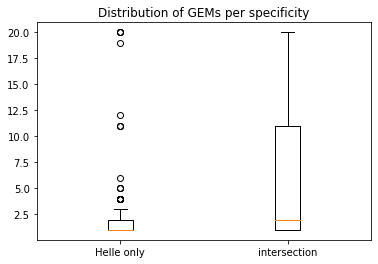

In [45]:
x1 = h_df[h_df.gem.isin(a_b)].gems_per_specificity.dropna()
x2 = h_df[h_df.gem.isin(ab)].gems_per_specificity.dropna()

plt.boxplot([x1, x2], labels=['Helle only','intersection'])
plt.title('Distribution of GEMs per specificity')
plt.show()

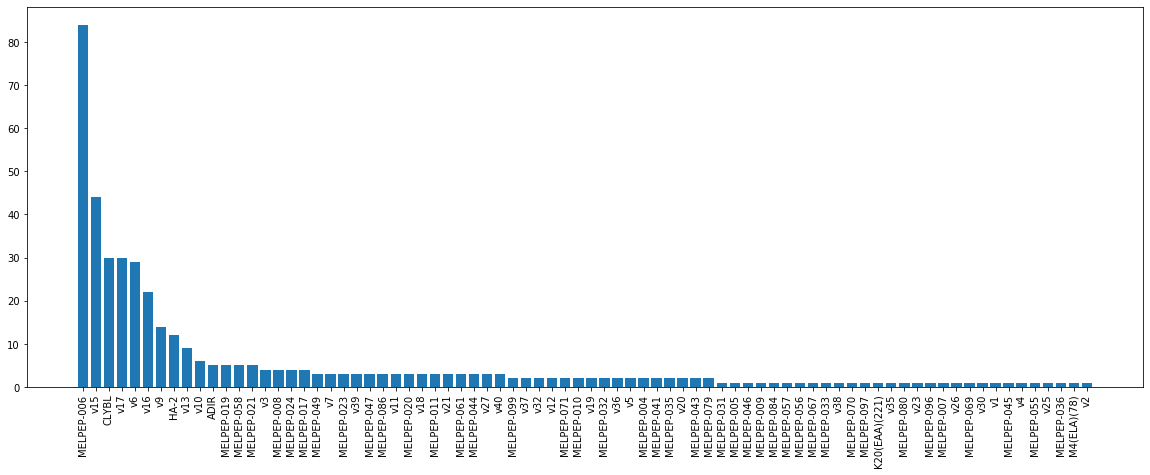

In [46]:
plt.figure(figsize=(20,7))
x = df[df.gem.isin(a_b)].epitope_x.value_counts().index
y = df[df.gem.isin(a_b)].epitope_x.value_counts().values
plt.bar(x,y)
plt.xticks(rotation=90, size=10)
plt.show()

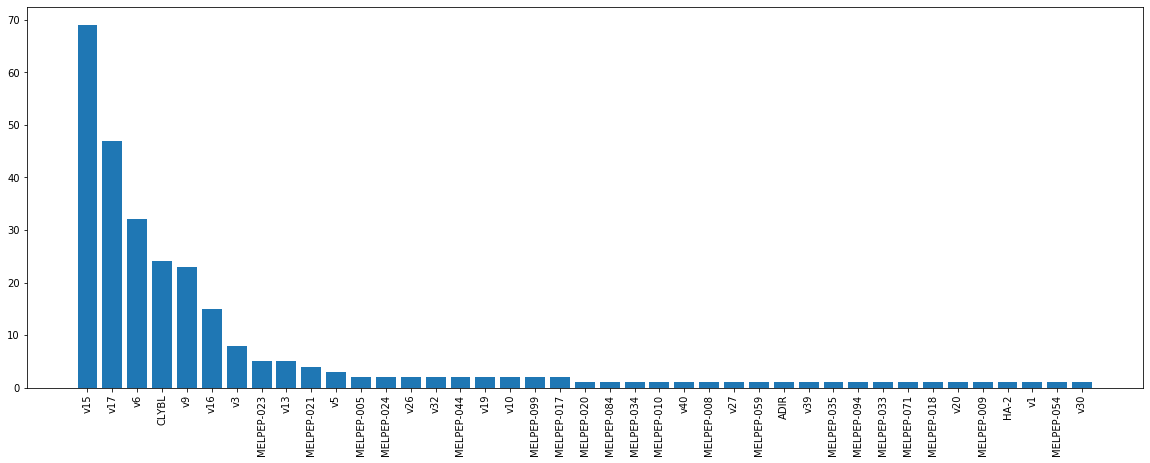

In [47]:
plt.figure(figsize=(20,7))
x = df[df.gem.isin(ab)].epitope_x.value_counts().index
y = df[df.gem.isin(ab)].epitope_x.value_counts().values
plt.bar(x,y)
plt.xticks(rotation=90, size=10)
plt.show()

In [63]:
# & (df.epitope_y !='0')
t = df[df.gem.isin(b_a)][['gem','cdr3_TRA','TRA.cdr3','cdr3_TRB','TRB.cdr3','epitope_x','epitope_y']].sort_values(by=['gem','epitope_y','TRB.cdr3','TRA.cdr3'])

In [64]:
t

,gem,cdr3_TRA,TRA.cdr3,cdr3_TRB,TRB.cdr3,epitope_x,epitope_y
1598,AACACGTAGCGTGAGT,NaN,NaN,NaN,CSARGTGEDSYEQYF,NaN,0
1586,AAGACCTTCATTTGGG,NaN,NaN,NaN,CASSQEDSRKVNEKLFF,NaN,MELPEP-008
1607,ACATGGTAGATGCCTT,NaN,CAVDGNTGKLIF,NaN,CASRTWGTQYF,NaN,v6
1599,ACGATGTAGAAGATTC,NaN,CAASNLVF,NaN,CASSLVVVDEQFF,NaN,0
1592,ACGGAGACATTCCTCG,NaN,CAAKSDSGGGADGLTF,NaN,CASSAWTSNRDEQFF,NaN,MELPEP-017
1614,AGAGTGGTCTCTGTCG,NaN,NaN,NaN,CASSPILAGVDTQYF,NaN,v15
1615,AGCGTATGTCCATCCT,NaN,CALSDPPHAGRDDKIIF,NaN,CATKRGLGDTQYF,NaN,v15
1591,AGCTTGACACATTTCT,NaN,CAASNLVF,NaN,CASSLVVVDEQFF,NaN,MELPEP-044
1581,ATCGAGTCATTAACCG,NaN,CAENIPGGYQKVTF,NaN,CASGEDGGEQFF,NaN,v31
1600,ATGGGAGAGAAGATTC,NaN,CILPLAGGTSYGKLTF,NaN,CASSLGQAYEQYF,NaN,0


# Number of GEMs with both TCR chains

Text(0.5, 1.0, 'GEMs with both TCR chains')

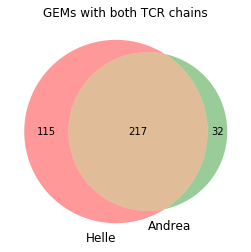

In [67]:
a = set(h_df[~h_df.cdr3_TRA.isna() & ~h_df.cdr3_TRB.isna()].gem)
b = set(m_df[~m_df['TRA.cdr3'].isna() & ~m_df['TRB.cdr3'].isna()].gem)

ab = a.intersection(b)
a_b = a - ab
b_a = b - ab

title = "GEMs with both TCR chains"
venn2(subsets = (len(a_b), len(b_a), len(ab)), set_labels = ('Helle', 'Andrea'))
plt.title(title)

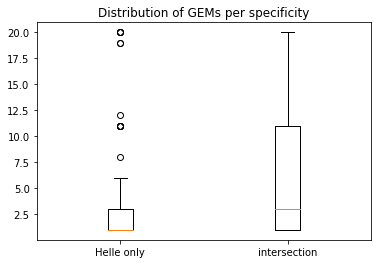

In [68]:
x1 = h_df[h_df.gem.isin(a_b)].gems_per_specificity.dropna()
x2 = h_df[h_df.gem.isin(ab)].gems_per_specificity.dropna()

plt.boxplot([x1, x2], labels=['Helle only','intersection'])
plt.title('Distribution of GEMs per specificity')
plt.show()

Text(0.5, 1.0, 'GEMs sharing MHC, TRA, and TRB')

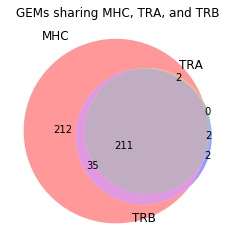

In [41]:
a = set(df[df.epitope_agreement].gem)
b = set(df[df.tra_agreement].gem)
c = set(df[df.trb_agreement].gem)

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

abc = ab.intersection(c)
ab_c = ab - abc
ac_b = ac - abc
bc_a = bc - abc
a_bc = a - ab_c - ac_b - abc
b_ac = b - ab_c - bc_a - abc
c_ab = c - ac_b - bc_a - abc

venn3(subsets = (len(a_bc), len(b_ac), len(ab_c), len(c_ab), len(ac_b), len(bc_a), len(abc)), set_labels = ('MHC', 'TRA', 'TRB'))
title = "GEMs sharing MHC, TRA, and TRB"
plt.title(title)

In [49]:
df[df.gem.isin(a_bc)][['gem','cdr3_TRA','umi_count_lst_TRA','TRA.cdr3','TRA.umis',
                       'cdr3_TRB','umi_count_lst_TRB','TRB.cdr3','TRB.umis',
                       'epitope_x','epitope_lst','epitope_y']].sort_values(by='TRA.cdr3')

,gem,cdr3_TRA,umi_count_lst_TRA,TRA.cdr3,TRA.umis,cdr3_TRB,umi_count_lst_TRB,TRB.cdr3,TRB.umis,epitope_x,epitope_lst,epitope_y
17,AACTCTTTCAATCTCT,CAASTPRNDYKLSF,[1],NaN,0.0,CSARSGVGNTIYF,"[6, 10]",NaN,0.0,v6,['v6'],v6
21,AAGGAGCTCTGTCCGT,CAETAGYGGSQGNLIF,[1],NaN,0.0,NaN,NaN,NaN,0.0,HA-2,['HA-2'],HA-2
24,AAGTCTGAGTTACCCA,CAVRGSDGQKLLF,[1],NaN,0.0,CASSLSSYEQYF,[1],NaN,0.0,CLYBL,['CLYBL'],CLYBL
25,AATCCAGCATTTGCTT,CAYSWETSGSRLTF,"[1, 3, 15]",NaN,0.0,CASSPTSGSVYEQYF,"[13, 20]",NaN,0.0,v6,['v6'],v6
26,ACACCAACAATAGCAA,CAAKSDSGGGADGLTF,"[4, 8]",NaN,0.0,CASSAWTSNRDEQFF,"[13, 32]",NaN,0.0,CLYBL,['CLYBL'],CLYBL
...,...,...,...,...,...,...,...,...,...,...,...,...
689,TTCGAAGCAAGAGGCT,NaN,NaN,NaN,0.0,CASSPGSHNEQFF,[1],NaN,0.0,v15,['v17' 'v15'],v17
690,TTCGAAGCAAGAGGCT,NaN,NaN,NaN,0.0,CASSPGSHNEQFF,[1],NaN,0.0,v15,['v17' 'v15'],v15
691,TTCGGTCAGGTCATCT,NaN,NaN,NaN,0.0,CASTKRGAGGPVHEQYF,"[1, 2]",NaN,0.0,v15,['v15'],v15
692,TTCGGTCAGTATGACA,NaN,NaN,NaN,0.0,CASSLVVVDEQFF,[1],NaN,0.0,MELPEP-086,['MELPEP-086'],MELPEP-086


In [50]:
m_df[m_df.gem.isin(a_bc)]

,gem,clonotype,raw_clonotype_id,TRA.cdr3,TRA.umis,TRB.cdr3,TRB.umis,epitope,reads,n_gems_w_clonotype
0,GCAAACTAGGCAATTA,NaN,NaN,NaN,0,NaN,0,MELPEP-046,1,1042
1,GCGCAGTAGTGAAGTT,NaN,NaN,NaN,0,NaN,0,MELPEP-072,4,1042
3,GCGCAGTAGTGAAGTT,NaN,NaN,NaN,0,NaN,0,MELPEP-082,9,1042
4,GCGCAGTAGTGAAGTT,NaN,NaN,NaN,0,NaN,0,MELPEP-055,10,1042
5,AGCAGCCAGCAGGCTA,NaN,NaN,NaN,0,NaN,0,MELPEP-031,15,1042
...,...,...,...,...,...,...,...,...,...,...
1189,TGCCCTACAGCTCGAC,NaN,NaN,NaN,0,NaN,0,v15,12,1042
1190,TGCTACCAGTGGTAAT,NaN,NaN,NaN,0,NaN,0,v15,9,1042
1192,TGTGGTAAGATCCTGT,NaN,NaN,NaN,0,NaN,0,v15,5,1042
1194,TTCGAAGCAAGAGGCT,NaN,NaN,NaN,0,NaN,0,v15,17,1042


Text(0.5, 1.0, 'GEMs sharing MHC, TRA, and TRB')

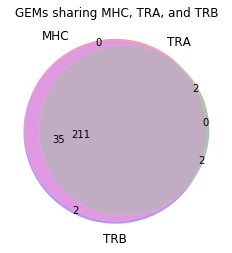

In [49]:
a = set(df[df.gem.isin(shared_gems) & df.epitope_agreement].gem)
b = set(df[df.gem.isin(shared_gems) & df.tra_agreement].gem)
c = set(df[df.gem.isin(shared_gems) & df.trb_agreement].gem)

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

abc = ab.intersection(c)
ab_c = ab - abc
ac_b = ac - abc
bc_a = bc - abc
a_bc = a - ab_c - ac_b - abc
b_ac = b - ab_c - bc_a - abc
c_ab = c - ac_b - bc_a - abc

venn3(subsets = (len(a_bc), len(b_ac), len(ab_c), len(c_ab), len(ac_b), len(bc_a), len(abc)), set_labels = ('MHC', 'TRA', 'TRB'))
title = "GEMs sharing MHC, TRA, and TRB"
plt.title(title)

In [72]:
df[df.gem.isin(bc_a)][['gem','epitope_x','epitope_lst', 'umi_count_lst_mhc','epitope_y']]

,gem,epitope_x,epitope_lst,umi_count_lst_mhc,epitope_y
1,AAAGATGTCAGGCAAG,v17,['v15' 'v17'],"[1, 1]",v15
405,GTGGGTCTCACTCTTA,v39,['MELPEP-044' 'v39'],"[1, 5]",MELPEP-044


In [73]:
df[df.gem.isin(ab_c)][['gem','cdr3_TRA','TRA.cdr3','cdr3_TRB','cdr3_lst_TRB', 'umi_count_lst_TRB','TRB.cdr3','epitope_x','epitope_y']].sort_values(by=['epitope_y','TRB.cdr3','TRA.cdr3'])

,gem,cdr3_TRA,TRA.cdr3,cdr3_TRB,cdr3_lst_TRB,umi_count_lst_TRB,TRB.cdr3,epitope_x,epitope_y
415,TACCTATAGCCACCTG,CAASEGGADGLTF,CAASEGGADGLTF,CASRPRLDGLYQETQYF,['CASRPRLDGLYQETQYF'],[7],NaN,CLYBL,CLYBL
387,GTAACGTGTTGGTGGA,CAVKNTDKLIF,CAVKNTDKLIF,NaN,[''],NaN,NaN,v16,v16


In [50]:
df[df.gem.isin(c_ab)][['gem','cdr3_TRA','TRA.cdr3','cdr3_TRB','TRB.cdr3','epitope_x','epitope_lst', 'umi_count_lst_mhc','epitope_y']].sort_values(by=['epitope_y','TRB.cdr3','TRA.cdr3'])

,gem,cdr3_TRA,TRA.cdr3,cdr3_TRB,TRB.cdr3,epitope_x,epitope_lst,umi_count_lst_mhc,epitope_y
612,GACTACAGTCCCTTGT,NaN,NaN,CASSTSLSGPTDTQYF,CASSTSLSGPTDTQYF,ADIR,['CLYBL' 'ADIR'],"[1, 1]",CLYBL
634,GGACGTCAGTGCGATG,NaN,CAASNLVF,CASSLILGLGESSYEQYF,CASSLILGLGESSYEQYF,MELPEP-021,['v15' 'MELPEP-021'],"[1, 1]",v15


In [75]:
df[df.gem.isin(ac_b)][['gem','cdr3_TRA','cdr3_lst_TRA', 'umi_count_lst_TRA','TRA.cdr3','cdr3_TRB','TRB.cdr3','epitope_x','epitope_y']].sort_values(by=['cdr3_TRA','gem'])

,gem,cdr3_TRA,cdr3_lst_TRA,umi_count_lst_TRA,TRA.cdr3,cdr3_TRB,TRB.cdr3,epitope_x,epitope_y
242,GACAGAGAGGACACCA,CAAKSDSGGGADGLTF,['CAAKSDSGGGADGLTF'],[1],NaN,CASSAWTSNRDEQFF,CASSAWTSNRDEQFF,CLYBL,CLYBL
465,TGAAAGAGTATAGGGC,CAAKSDSGGGADGLTF,"['CAADNNARLMF', 'CAAKSDSGGGADGLTF']","[1, 1]",CAADNNARLMF,CSARDRVGNGYTF,CSARDRVGNGYTF,v6,v6
148,CCACCTACACCGTTGG,CAARPGAQKLVF,['CAARPGAQKLVF'],[4],NaN,CASSLERGLRPYEQYF,CASSLERGLRPYEQYF,v15,v15
73,AGGCCACGTACCTACA,CAGCLGGTYKYIF,"['CAASELGTYKYIF', 'CAGCLGGTYKYIF']","[1, 2]",CAASELGTYKYIF,CASSEDFANEQFF,CASSEDFANEQFF,MELPEP-059,MELPEP-059
12,AACTCAGGTCATCGGC,CALPVGGAQKLVF,['CALPVGGAQKLVF'],[1],NaN,CASSLILGLGESSYEQYF,CASSLILGLGESSYEQYF,v15,v15
79,AGTGGGACACAAGACG,CALPVGGAQKLVF,['CALPVGGAQKLVF'],[1],NaN,CASSLILGLGESSYEQYF,CASSLILGLGESSYEQYF,v15,v15
31,ACCAGTATCGTGACAT,CALPWFSDGQKLLF,['CALPWFSDGQKLLF'],[2],CALPWF,CSVVTGPVLYGYTF,CSVVTGPVLYGYTF,v17,v17
244,GACGGCTCAAACTGCT,CALPWFSDGQKLLF,['CALPWFSDGQKLLF'],[5],CALPWF,CSVVTGPVLYGYTF,CSVVTGPVLYGYTF,MELPEP-020,MELPEP-020
157,CCGTACTAGACTTTCG,CAVIYTNYGGSQGNLIF,['CAVIYTNYGGSQGNLIF'],[1],NaN,CASSIYSNQPQHF,CASSIYSNQPQHF,v3,v3
508,TTTGTCACAGAGTGTG,CAVLTSGSRLTF,['CAVLTSGSRLTF'],[1],NaN,CAIRNPGGEQYF,CAIRNPGGEQYF,v15,v15


In [145]:
df[df.gem.isin(ac_b) & ~df.cdr3_TRA.isna()].gem.unique().shape

(11,)

In [146]:
df[df.gem.isin(ac_b) & df.cdr3_TRA.isna()].gem.unique().shape

(24,)

In [148]:
df[df.gem.isin(ac_b) & df.cdr3_TRA.isna() & ~df['TRA.cdr3'].isna()].gem.unique().shape

(3,)

In [147]:
df[df.gem.isin(ac_b) & df.cdr3_TRA.isna() & df['TRA.cdr3'].isna()].gem.unique().shape

(21,)

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


Text(0.5, 1.0, 'All GEMs sharing epitopes')

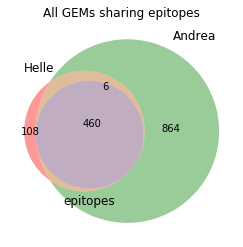

In [76]:
a = set(h_df.gem)
b = set(m_df.gem)
c = set(df[df.epitope_agreement].gem)

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

abc = ab.intersection(c)
ab_c = ab - abc
ac_b = ac - abc
bc_a = bc - abc
a_bc = a - ab_c - ac_b - abc
b_ac = b - ab_c - bc_a - abc
c_ab = c - ac_b - bc_a - abc

venn3(subsets = (len(a_bc), len(b_ac), len(ab_c), len(c_ab), len(ac_b), len(bc_a), len(abc)), set_labels = ('Helle', 'Andrea', 'epitopes'))
title = "All GEMs sharing epitopes"
plt.title(title)

In [77]:
df[df.gem.isin(ab_c)][['gem','cdr3_TRA','TRA.cdr3','cdr3_TRB','TRB.cdr3','epitope_x','epitope_lst','umi_count_lst_mhc','epitope_y']].sort_values(by=['epitope_x','epitope_y','TRB.cdr3','TRA.cdr3'])

,gem,cdr3_TRA,TRA.cdr3,cdr3_TRB,TRB.cdr3,epitope_x,epitope_lst,umi_count_lst_mhc,epitope_y
612,GACTACAGTCCCTTGT,NaN,NaN,CASSTSLSGPTDTQYF,CASSTSLSGPTDTQYF,ADIR,['CLYBL' 'ADIR'],"[1, 1]",CLYBL
634,GGACGTCAGTGCGATG,NaN,CAASNLVF,CASSLILGLGESSYEQYF,CASSLILGLGESSYEQYF,MELPEP-021,['v15' 'MELPEP-021'],"[1, 1]",v15
1,AAAGATGTCAGGCAAG,CALSESHHVGFKTIF,CALSESHHVGFKTIF,CASSLDTGGTSYTF,CASSLDTGGTSYTF,v17,['v15' 'v17'],"[1, 1]",v15
516,ACGATGTCATGTAGTC,NaN,NaN,CASSAWTSNRDEQFF,NaN,v18,['v23' 'v18'],"[1, 1]",v23
405,GTGGGTCTCACTCTTA,CAAKSDSGGGADGLTF,CAAKSDSGGGADGLTF,CASSAWTSNRDEQFF,CASSAWTSNRDEQFF,v39,['MELPEP-044' 'v39'],"[1, 5]",MELPEP-044
240,CTTTGCGTCTGCGTAA,CAALETSYDKVIF,NaN,NaN,NaN,v4,['v17' 'v4'],"[1, 2]",v17


# Write file

In [10]:
df.to_csv('check_exp2.csv', index=False)